In [9]:
import pandas as pd
import numpy as np

df = pd.read_csv('global_power_plant_database.csv')

print("Column Names:\n", df.columns)
df.fillna(0, inplace=True)
print("\nMissing Values:\n", missing_values)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

numeric_columns = [
    'capacity_mw', 'latitude', 'longitude', 'commissioning_year',
    'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
    'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
    'generation_gwh_2018', 'generation_gwh_2019', 'estimated_generation_gwh_2013',
    'estimated_generation_gwh_2014', 'estimated_generation_gwh_2015',
    'estimated_generation_gwh_2016', 'estimated_generation_gwh_2017'
]

for column in numeric_columns:
    if column in df.columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')

print("\nData Types After Conversion:\n", df.dtypes)

<ipython-input-9-d9c185dca398>:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('global_power_plant_database.csv')


Column Names:
 Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
       'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
       'estimated_generation_gwh_2017', 'estimated_generation_note_2013',
       'estimated_generation_note_2014', 'estimated_generation_note_2015',
       'estimated_generation_note_2016', 'estimated_generation_note_2017'],
      dtype='object')

Missing Values:
 country                               0
country_long                          0
nam

Summary Statistics:
                                  count        mean          std       min  \
capacity_mw                    34936.0  163.355148   489.636072    1.0000   
latitude                       34936.0   32.816637    22.638603  -77.8470   
longitude                      34936.0   -6.972803    78.405850 -179.9777   
commissioning_year             34936.0  997.506767   998.857845    0.0000   
year_of_capacity_data          34936.0  860.007557   998.048133    0.0000   
generation_gwh_2013            34936.0  108.865666   959.867513 -947.6000   
generation_gwh_2014            34936.0  135.862677  1049.093115 -989.6190   
generation_gwh_2015            34936.0  179.004797  1269.384526 -864.4280   
generation_gwh_2016            34936.0  181.422070  1267.279351 -768.6200   
generation_gwh_2017            34936.0  179.969788  1270.071080 -934.9440   
generation_gwh_2018            34936.0  142.701523  1062.866856 -982.6220   
generation_gwh_2019            34936.0  117.204798   91

<ipython-input-11-16128d516dfa>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_distribution.index, y=country_distribution.values, palette='viridis')


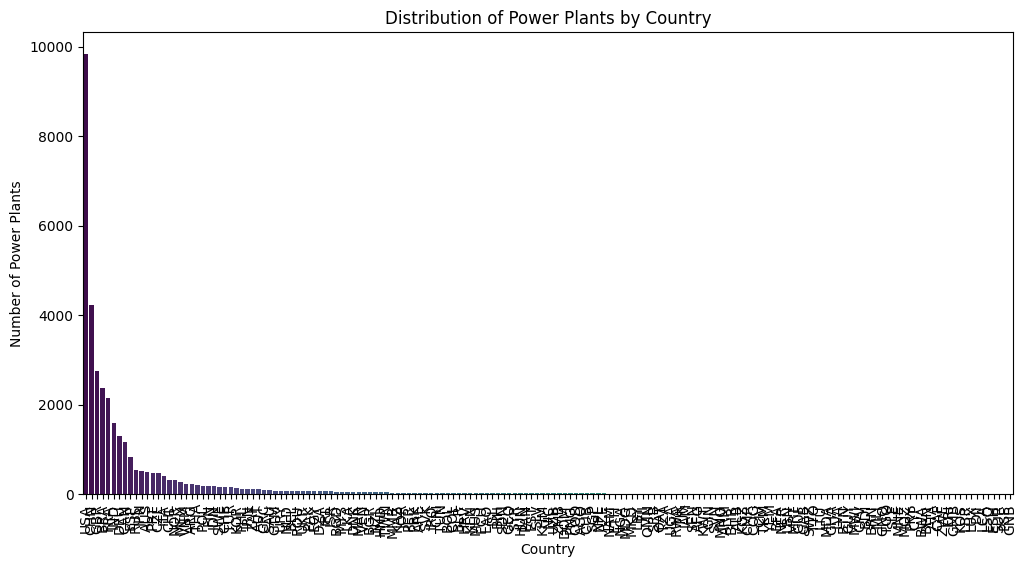


Distribution of Power Plants by Fuel Type:
 primary_fuel
Solar             10665
Hydro              7156
Wind               5344
Gas                3998
Coal               2330
Oil                2320
Biomass            1430
Waste              1068
Nuclear             195
Geothermal          189
Storage             135
Other                43
Cogeneration         41
Petcoke              12
Wave and Tidal       10
Name: count, dtype: int64


<ipython-input-11-16128d516dfa>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fuel_type_distribution.index, y=fuel_type_distribution.values, palette='viridis')


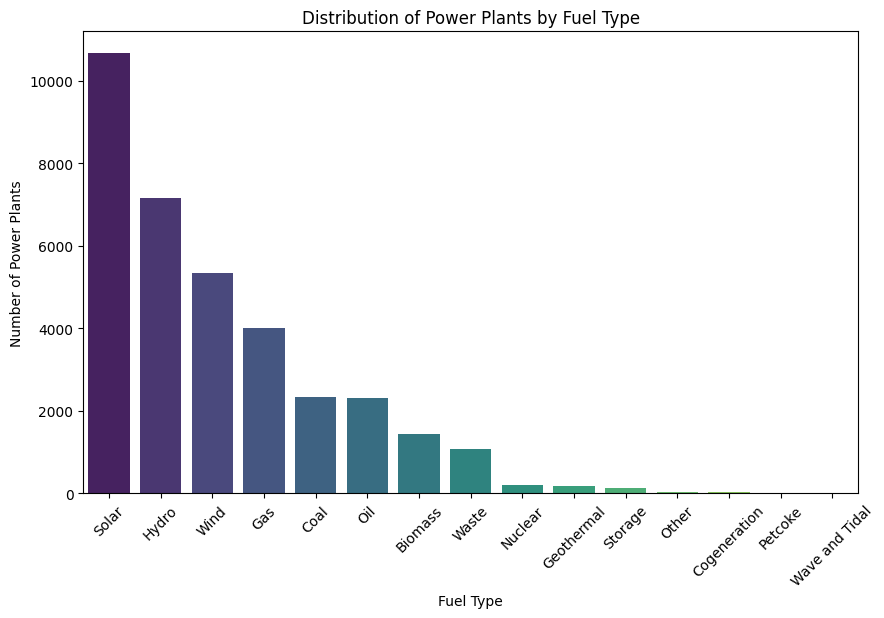

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

summary_statistics = df.describe().transpose()
print("Summary Statistics:\n", summary_statistics)

country_distribution = df['country'].value_counts()
print("\nDistribution of Power Plants by Country:\n", country_distribution)

plt.figure(figsize=(12, 6))
sns.barplot(x=country_distribution.index, y=country_distribution.values, palette='viridis')
plt.title('Distribution of Power Plants by Country')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ylabel('Number of Power Plants')
plt.xticks(rotation=90)
plt.show()

fuel_type_distribution = df['primary_fuel'].value_counts()
print("\nDistribution of Power Plants by Fuel Type:\n", fuel_type_distribution)

plt.figure(figsize=(10, 6))
sns.barplot(x=fuel_type_distribution.index, y=fuel_type_distribution.values, palette='viridis')
plt.title('Distribution of Power Plants by Fuel Type')
plt.xlabel('Fuel Type')
plt.xticks(rotation=45)
plt.ylabel('Number of Power Plants')
plt.xticks(rotation=45)
plt.show()


Summary Statistics for Power Output by Fuel Type:
                        mean      median          std    count
Hydro            147.171551    20.00000   549.770911   7156.0
Solar             17.657039     5.80000    41.937445  10665.0
Gas              373.449375   147.50000   560.863990   3998.0
Other             84.020000    40.00000   144.185002     43.0
Oil              112.878754     9.00000   391.924545   2320.0
Wind              49.224126    27.00000   106.128423   5344.0
Nuclear         2091.855179  1888.00000  1300.162646    195.0
Coal             843.579828   600.00000   887.996568   2330.0
Waste             13.809657     4.80000    20.572864   1068.0
Biomass           23.972938     9.45000    39.448004   1430.0
Wave and Tidal    55.220000     5.00000    96.235106     10.0
Petcoke          202.048125    65.48875   456.679766     12.0
Geothermal        67.130952    30.00000   114.337205    189.0
Storage           12.683704     4.90000    35.442628    135.0
Cogeneration      9

<ipython-input-13-8ef1cb516f58>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='primary_fuel', y='capacity_mw', data=df, palette='viridis')


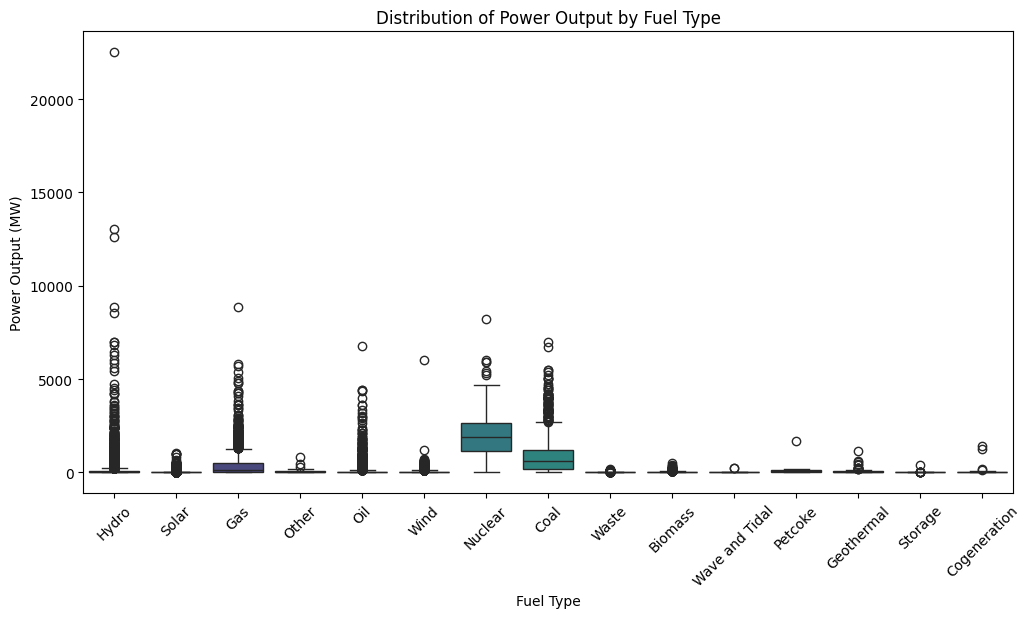

In [13]:
from scipy import stats

fuel_types = df['primary_fuel'].unique()
summary_stats = {}

for fuel in fuel_types:
    data = df[df['primary_fuel'] == fuel]['capacity_mw']
    summary_stats[fuel] = {
        'mean': np.mean(data),
        'median': np.median(data),
        'std': np.std(data),
        'count': len(data)
    }

summary_stats_df = pd.DataFrame(summary_stats).transpose()
print("Summary Statistics for Power Output by Fuel Type:\n", summary_stats_df)

fuel_type1 = 'Coal'
fuel_type2 = 'Gas'

data1 = df[df['primary_fuel'] == fuel_type1]['capacity_mw']
data2 = df[df['primary_fuel'] == fuel_type2]['capacity_mw']

t_stat, p_value = stats.ttest_ind(data1, data2)
print(f"\nHypothesis Testing Between {fuel_type1} and {fuel_type2}:")
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print(f"The mean power output differs significantly between {fuel_type1} and {fuel_type2}.")
else:
    print(f"There is no significant difference in mean power output between {fuel_type1} and {fuel_type2}.")

plt.figure(figsize=(12, 6))
sns.boxplot(x='primary_fuel', y='capacity_mw', data=df, palette='viridis')
plt.title('Distribution of Power Output by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Power Output (MW)')
plt.xticks(rotation=45)
plt.show()

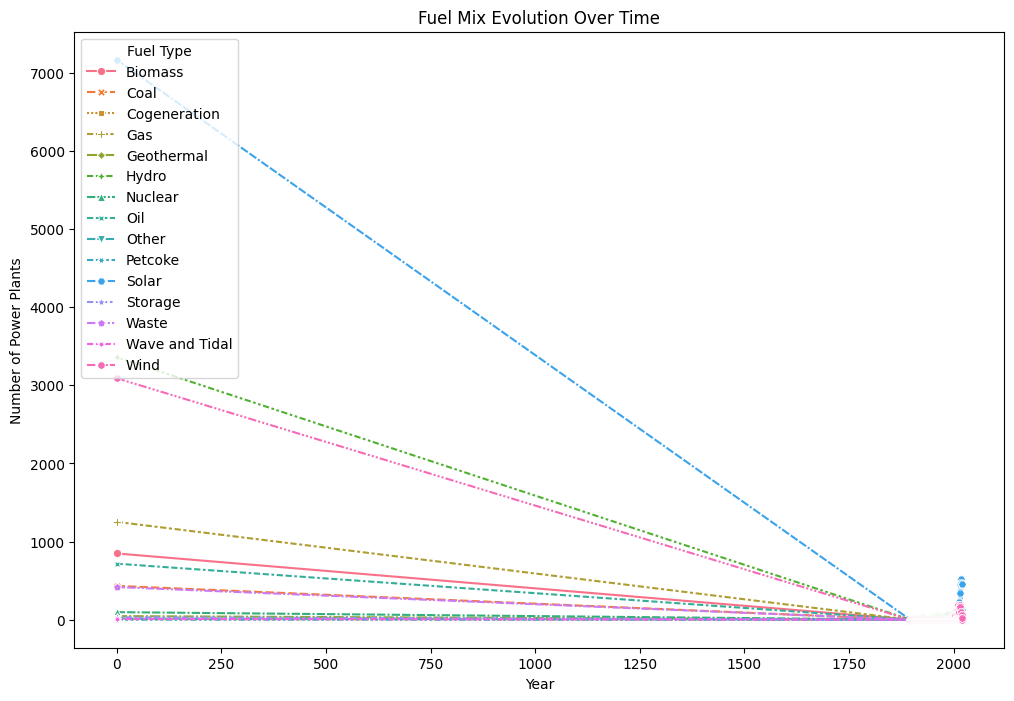

In [14]:
df['commissioning_year'] = pd.to_numeric(df['commissioning_year'], errors='coerce')

fuel_mix_over_time = df.groupby(['commissioning_year', 'primary_fuel']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.lineplot(data=fuel_mix_over_time, markers=True)
plt.title('Fuel Mix Evolution Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Power Plants')
plt.legend(title='Fuel Type', loc='upper left')
plt.show()

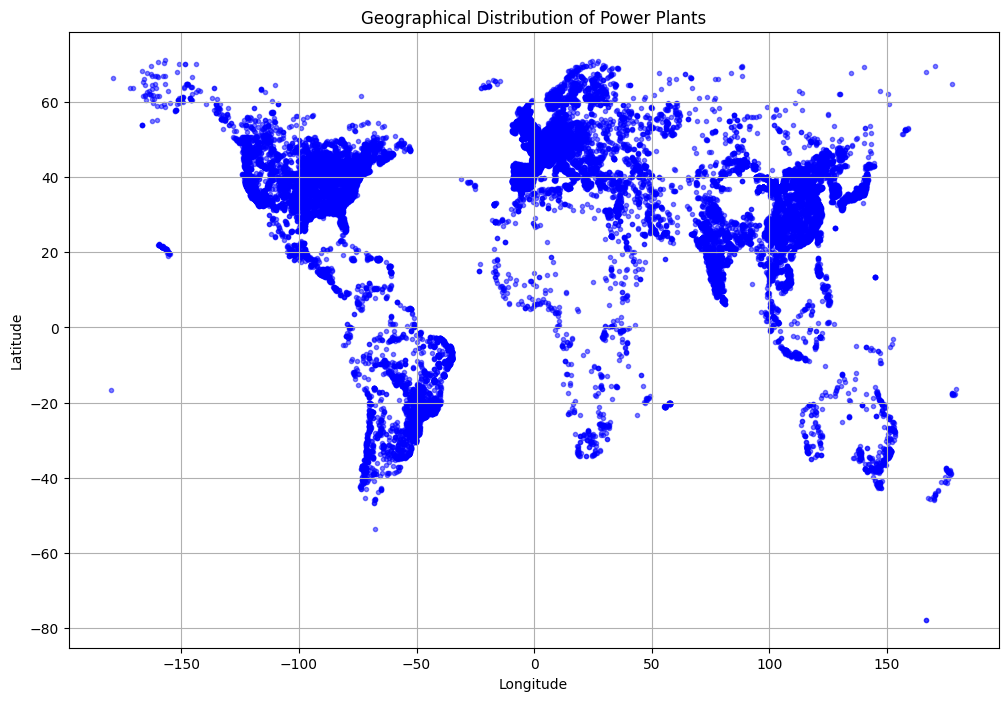

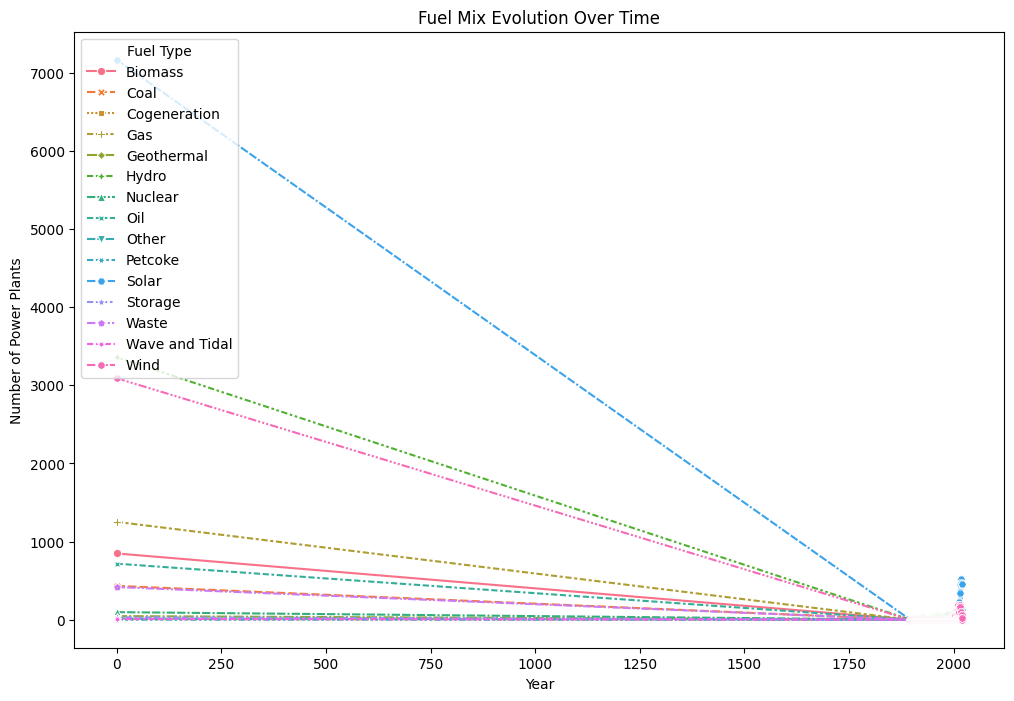

In [16]:
plt.figure(figsize=(12, 8))
plt.scatter(df['longitude'], df['latitude'], alpha=0.5, c='b', marker='.')
plt.title('Geographical Distribution of Power Plants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

fuel_mix_over_time = df.groupby(['commissioning_year', 'primary_fuel']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.lineplot(data=fuel_mix_over_time, markers=True)
plt.title('Fuel Mix Evolution Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Power Plants')
plt.legend(title='Fuel Type', loc='upper left')
plt.show()

In [30]:
import pandas as pd
import numpy as np

file_path = 'global_power_plant_database.csv'
df = pd.read_csv(file_path)
df_selected.dropna(inplace=True)

selected_columns = ['primary_fuel', 'capacity_mw', 'latitude', 'longitude']
df_selected = df[selected_columns]
capacity = df_selected['capacity_mw'].values
latitude = df_selected['latitude'].values
longitude = df_selected['longitude'].values

data_matrix = np.array([capacity, latitude, longitude])

covariance_matrix = np.cov(data_matrix)
print("Covariance Matrix:\n", covariance_matrix)

correlation_matrix = np.corrcoef(data_matrix)
print("\nCorrelation Matrix:\n", correlation_matrix)

Covariance Matrix:
 [[ 2.39743483e+05 -1.46512725e+02  5.81707732e+03]
 [-1.46512725e+02  5.12506327e+02 -1.21328995e+02]
 [ 5.81707732e+03 -1.21328995e+02  6.14747738e+03]]

Correlation Matrix:
 [[ 1.         -0.01321759  0.15152454]
 [-0.01321759  1.         -0.06835441]
 [ 0.15152454 -0.06835441  1.        ]]


<ipython-input-30-85bd5b355740>:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-30-85bd5b355740>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.dropna(inplace=True)


Filtered DataFrame:
            A   B  C
0   0.364589  65  X
4   0.536150  57  X
18  0.014673  88  X
19  0.434957  85  X
21  0.381630  95  X
25  0.896828  83  X
27  0.373049  88  X
31  0.315524  97  X
38  0.533307  59  X
39  0.156269  75  X
47  0.754910  98  X
49  0.997192  93  X
53  0.171298  87  X
58  0.294008  88  X
68  0.793740  90  X
71  0.601364  83  X
76  0.525351  69  X
80  0.917852  67  X
85  0.910036  71  X
93  0.361947  79  X
94  0.386855  68  X
98  0.275965  68  X


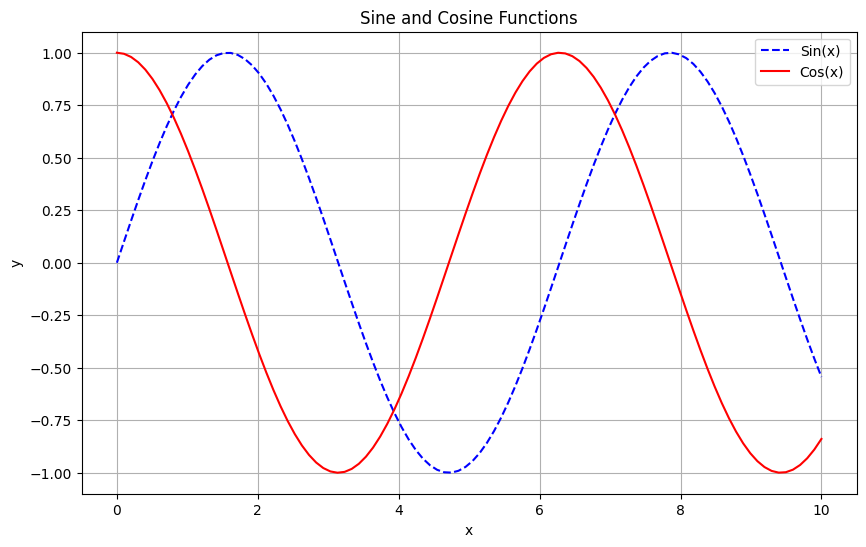

In [21]:
#NumPy arrays (np.random.rand, np.random.randint, np.random.choice) are used to create a sample DataFrame df.
#NumPy is then utilized within Pandas to filter rows where column B values are greater than 50 and column C values are 'X'.

import pandas as pd
import numpy as np

data = {
    'A': np.random.rand(100),
    'B': np.random.randint(1, 100, 100),
    'C': np.random.choice(['X', 'Y', 'Z'], 100)
}

df = pd.DataFrame(data)
filtered_data = df[(df['B'] > 50) & (df['C'] == 'X')]
print("Filtered DataFrame:\n", filtered_data)

#NumPy arrays (np.linspace, np.sin, np.cos) are used to generate x values
#and corresponding y1 (sine) and y2 (cosine) values.
#Matplotlib then plots these arrays to create a visualization of sine and cosine functions.

import matplotlib.pyplot as plt
import numpy as np

# Example data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Create a plot using Matplotlib with NumPy arrays
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='Sin(x)', linestyle='--', color='blue')
plt.plot(x, y2, label='Cos(x)', linestyle='-', color='red')
plt.title('Sine and Cosine Functions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()